In [1]:
#회귀
from keras.models import Sequential #models 서브패키지
from keras.layers import Dense #layers 모델구성
from sklearn.datasets import make_regression

#MinMaxScaler 신경망-정규화
from sklearn.preprocessing import MinMaxScaler

#X=100x2 y=100
X,y=make_regression(n_samples=100,n_features=2,
                   noise=0.1,random_state=1)
scalarX,scalarY=MinMaxScaler(),MinMaxScaler() #값의 범위가 (데이터사이즈가) 다르므로 
scalarX.fit(X)
scalarY.fit(y.reshape(100,1)) #y=100 열, 행으로 만들어 주기 위해 
X=scalarX.transform(X)
y=scalarY.transform(y.reshape(100,1))

#케라스모델시작
model=Sequential()
#layer depth
#100x2 출력차수지정, 2x4 의 가중치(의 차수를 자동으로 맞춰줌), 결과는 100x4
model.add(Dense(4,input_dim=2,activation='relu'))  #ffnn 만들때
#100x4(출력이 입력으로) 4x4 100x4
model.add(Dense(4,activation='relu'))
#100x4 4x1 100x1 예측
model.add(Dense(1,activation='linear'))
#backend=tensorflow 
#mse, cross entropy kl_divergence
model.compile(loss='mse',optimizer='adam') #tensorflow 로 모델을 변환
model.fit(X,y,epochs=1000,verbose=0) #2개의 for문 대신 

Xnew,a=make_regression(n_samples=3,n_features=2,noise=0.1,random_state=1) #a를 쓴 이유:make_regression x,y 값이 필요하니까
Xnew=scalarX.transform(Xnew)
ynew=model.predict(Xnew)

for i in range(len(Xnew)):
    print('입력데이터=%s,예측결과=%s' %(Xnew[i],ynew[i]))
    



Using TensorFlow backend.



입력데이터=[0.29466096 0.30317302],예측결과=[0.17289366]
입력데이터=[0.39445118 0.79390858],예측결과=[0.74440247]
입력데이터=[0.02884127 0.6208843 ],예측결과=[0.40264118]


In [2]:
from keras.models import Sequential #models 서브패키지
from keras.layers import Dense #layers 모델구성
from sklearn.datasets import make_regression



import numpy 
numpy.random.seed(7)
dataset=numpy.loadtxt('pima.data',delimiter=',')
X=dataset[:,0:8] #8개의 독립변수
Y=dataset[:,8] #종속변수 8번째 독립변수의 종속변수를 모름(784이긴하지만) 
model=Sequential()
print(X.shape)
print(Y.shape)
#? # 8 8x12=>?x12
model.add(Dense(12,input_dim=8, kernel_initializer='uniform', activation='relu'))
#?x12 12x8 =>?x8                                #초기화:균등분포
model.add(Dense(8, activation='relu'))
#?x8 8x1->?X1
model.add(Dense(1,activation='sigmoid')) #분류 0.5 기준으로 크면 1 작으면 0
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy']) 


#model.fit(X,Y,epochs=150,batch_size=10)
#데이터 분리 입력 (train, test):과적합
#train, validation ,test
history=model.fit(X,Y,validation_split=0.33, epochs=150,batch_size=10)
scores=model.evaluate(X,Y) #accuracy 를 출력해줌


#1번 loss ,2번째 accuracy (metrics=['accuracy'])??
print('\n%s:%.2f%%' % (model.metrics_names[1],scores[1]*100))

          

(768, 8)
(768,)
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 514 samples, validate on 254 samples
Epoch 1/150
514/514 [==============================] - 0s 646us/step - loss: 0.6906 - accuracy: 0.6576 - val_loss: 0.6556 - val_accuracy: 0.6575
Epoch 2/150
514/514 [==============================] - 0s 129us/step - loss: 0.6548 - accuracy: 0.6245 - val_loss: 0.6272 - val_accuracy: 0.6614
Epoch 3/150
514/514 [==============================] - 0s 110us/step - loss: 0.6417 - accuracy: 0.6479 - val_loss: 0.6330 - val_accuracy: 0.6614
Epoch 4/150
514/514 [==============================] - 0s 111us/step - loss: 0.6362 - accuracy: 0.6440 - val_loss: 0.6299 - val_accuracy: 0.6693
Epoch 5/150
514/514 [==============================] - 0s 111us/step - loss: 0.6282 - accuracy: 0.6615 - val_loss: 0.6196 - val_accuracy: 0.6732
Epoch 6/150
514/514 [==============================] - 0s 111us/step - loss: 0.6217 - accuracy: 0.6556 - val_loss: 0.61

514/514 [==============================] - 0s 104us/step - loss: 0.5408 - accuracy: 0.7276 - val_loss: 0.5727 - val_accuracy: 0.7323
Epoch 55/150
514/514 [==============================] - 0s 105us/step - loss: 0.5434 - accuracy: 0.7179 - val_loss: 0.5630 - val_accuracy: 0.7165
Epoch 56/150
514/514 [==============================] - 0s 109us/step - loss: 0.5443 - accuracy: 0.7101 - val_loss: 0.5758 - val_accuracy: 0.7126
Epoch 57/150
514/514 [==============================] - 0s 106us/step - loss: 0.5472 - accuracy: 0.7257 - val_loss: 0.5696 - val_accuracy: 0.7087
Epoch 58/150
514/514 [==============================] - 0s 114us/step - loss: 0.5415 - accuracy: 0.7179 - val_loss: 0.5946 - val_accuracy: 0.6575
Epoch 59/150
514/514 [==============================] - 0s 103us/step - loss: 0.5516 - accuracy: 0.7257 - val_loss: 0.5598 - val_accuracy: 0.7323
Epoch 60/150
514/514 [==============================] - 0s 107us/step - loss: 0.5388 - accuracy: 0.7257 - val_loss: 0.5515 - val_accuracy

514/514 [==============================] - 0s 105us/step - loss: 0.5145 - accuracy: 0.7237 - val_loss: 0.5934 - val_accuracy: 0.7165
Epoch 111/150
514/514 [==============================] - 0s 116us/step - loss: 0.5096 - accuracy: 0.7393 - val_loss: 0.5689 - val_accuracy: 0.7244
Epoch 112/150
514/514 [==============================] - 0s 105us/step - loss: 0.4977 - accuracy: 0.7588 - val_loss: 0.5608 - val_accuracy: 0.7323
Epoch 113/150
514/514 [==============================] - 0s 109us/step - loss: 0.5047 - accuracy: 0.7626 - val_loss: 0.5419 - val_accuracy: 0.7402
Epoch 114/150
514/514 [==============================] - 0s 104us/step - loss: 0.5011 - accuracy: 0.7451 - val_loss: 0.5403 - val_accuracy: 0.7441
Epoch 115/150
514/514 [==============================] - 0s 106us/step - loss: 0.5026 - accuracy: 0.7529 - val_loss: 0.5317 - val_accuracy: 0.7520
Epoch 116/150
514/514 [==============================] - 0s 105us/step - loss: 0.4954 - accuracy: 0.7549 - val_loss: 0.5397 - val_ac

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


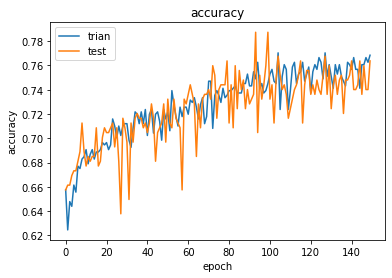

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

print(history.history.keys())

#val_loss,val_accuracy,loss,accuracy :4개 나옴

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['trian','test'],loc='upper left')

plt.show()

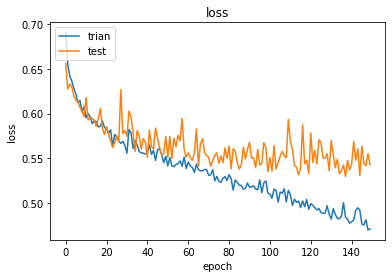

In [4]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['trian','test'],loc='upper left')
plt.show()

In [5]:
########여기서부터 

In [6]:
from sklearn.preprocessing import scale
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
X,Y=make_moons(noise=0.2, random_state=0, n_samples=1000)
X=scale(X)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.5)
print(X.shape)
print(Y.shape)

(1000, 2)
(1000,)


[Text(0, 0.5, 'Y'),
 Text(0.5, 0, 'X'),
 Text(0.5, 1.0, 'history classification')]

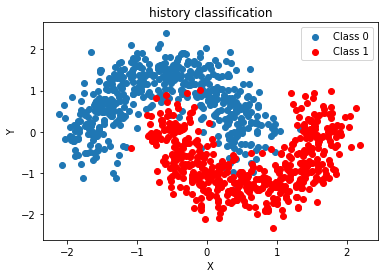

In [7]:
fif,ax=plt.subplots()
ax.scatter(X[Y==0,0],X[Y==0,1],label='Class 0')
ax.scatter(X[Y==1,0],X[Y==1,1],color='r',label='Class 1')
ax.legend()
ax.set(xlabel='X',ylabel='Y',title='history classification')

In [8]:
import keras
# 비선형일 때 신경망을 사용한다.
model = Sequential()
# 입력데이터 1000x2 2x32 => 1000x32 (차원확대 2->32 => 설명이 잘된다) 
#param 96인 이유 2x32=64 +(가중치)32=96 !!!!!!
model.add(Dense(32, input_dim=2, activation="relu"))
# 1000x32 32x1 => 1000x1(분류)
model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer="AdaDelta", loss="binary_crossentropy", metrics=["accuracy"])

# callback함수 : winodows에서 event후에 자동으로 호출되어지는 함수
# graph image 출력
tb_callback = keras.callbacks.TensorBoard(log_dir="./Graph/model_1/",
                                          histogram_freq=100,
                                          write_graph=True,
                                          write_images=False)
tb_callback.set_model(model) # callback함수를 model에 등록

In [9]:
hist = model.fit(X_train, Y_train, batch_size=32, epochs=200, verbose=0, validation_data=(X_test, Y_test), callbacks=[tb_callback])


In [10]:
score=model.evaluate(X_test,Y_test,verbose=0)
print('test loss:',score[0])
print('test accuracy:',score[1])

test loss: 0.12789358568191528
test accuracy: 0.949999988079071


In [11]:
keras.utils.print_summary(model)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 32)                96        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total params: 129
Trainable params: 129
Non-trainable params: 0
_________________________________________________________________


In [12]:
keras.utils.plot_summary(model)

AttributeError: module 'keras.utils' has no attribute 'plot_summary'

In [ ]:
from keras.utils.vis_utils import model_to_dot
model_to_dot(model)

In [ ]:
from IPython.desplay import Image, SVG
SVG(model_to_dot(model).create(prog='dot',format='svg'))

In [ ]:
model.summary()

In [ ]:
from keras.datasets import mnist
import matplotlib.pylab as plt
(X_train0,y_train0),(X_test0,y_test0)=mnist.load_data()
print(X_train0.shape,X_train0.dtype) #60000, 28x28  원본이미지 보통 인터넷에서 다운받으면 640 x 640
print(y_train0.shape,y_train0.dtype) #60000
print(X_test0.shape,X_test0.dtype) #10000 28x28
print(y_test0.shape,y_test0.dtype) #10000 28x28

In [ ]:
plt.imshow(X_train0[0])
plt.grid(False)
plt.show()


In [ ]:
#fully-connected:flatten :ffnn 은 
#이미지 정규화 :0~255 컬러값 /255  => 0~1
X_train=X_train0.reshape(60000,784).astype('float32')/255.0  
X_test=X_test0.reshape(10000,784).astype('float32')/255.0
print(X_train.shape, X_train.dtype)


In [ ]:
y_train0[:5] #one hot encoding 여부 
#:multi label일 경우 sotfmax(경우의 수에 대한 확률값) -3개 이상인 경우 사용!! 2개일때는 (binary.....)
#5, 0, 4, 1, 9 :원핫인코딩이 안되어 있음

In [ ]:
from keras.utils import np_utils
Y_train=np_utils.to_categorical(y_train0,10)
Y_test=np_utils.to_categorical(y_test0,10)
Y_train[:5]

In [ ]:
import numpy as np
from keras.optimizers import SGD

np.random.seed(0)
model=Sequential()

#60000x784 ,784 x 15 =>60000x15
model.add(Dense(512,input_dim=784,activation='sigmoid'))
model.add(Dense(15))
#60000x15 15x10 =>60000x 10
model.add(Dense(10,activation='sigmoid')) #확률값으로 출력
#lr:learning rate
#stochastic gradient descent
model.compile(optimizer=SGD(lr=0.2),loss='mean_squared_error',metrics=['accuracy'])

In [ ]:
model.layers

In [ ]:
l1=model.layers[0]
l2=model.layers[1]
#레이어 속성으로 정보 확인
l1.name
l1.input_shape
l1.output_shape
l1.activation

In [ ]:
#callbacks class 
#Custom callbacks 함수의 제작
#함수에 의해서 호출되는 객체
class CustomHistory(keras.callbacks.Callback): #상속
    def init(self):
        self.train_loss=[]
        self.val_loss=[]
        self.train_acc=[]
        self.val_acc=[]
    def on_epoch_end(self,batch,logs={}): #오버라이딩
        self.train_loss.append(logs.get('loss'))
        self.val_loss.append(logs.get('val_loss'))
        self.train_acc.append(logs.get('accuracy'))
        self.val_loss.append(logs.get('val_loss'))

In [ ]:
#callback function 사용
custom_hist=CustomHistory()
custom_hist.init()

hist=model.fit(X_train,Y_train,nb_epoch=30,batch_size=1000,validation_data=(X_test,Y_test),verbose=2,callbacks=[custom_hist]
plt.plot(hist.history['loss'])
plt.show()

In [ ]:
plt.plot(hist.history['accuracy'],'b-',label='training')
plt.plot(hist.history['val_accuracy'],'r-',label='test')
plt.legend()
plt.show()

print(hist.model)
print(hist.param)
print(hist.history['acc'])
print(hist.hisrory['vall_accracy'][29])

In [ ]:
######문제 X_test 의 이미지 한장의 label 을 예측해보시오

In [ ]:
model.predict(X_test[:1,:])

In [ ]:
model.predict_classes(X_test[:1,:],verbose=0) #넘버로 바꿔줌....

In [ ]:
#######문제 :출력 차수가 512인 레이어를 추가하시오 (위)

In [ ]:
#집값예측
from keras.datasets import boston_housing
(x_train, y_train),(x_test,y_test)=boston_housing.load_data()
print(x_train.shape)
print(y_train.shape)

In [ ]:
model=Sequential()
num_features=13
model.add(Dense(1,input_dim=num_features,activation='linear'))

In [ ]:
model.summary()
model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
model.fit(x_train,y_train,batch_size=1,epochs=10,verbose=1)

In [ ]:
#accuracy 였는데 바뀐이유:loss='mse',metrics=['mae']
mse,mae=model.evaluate(x_test,y_test,verbose=False)
rmse=np.sqrt(mse)
mse,rmse,mae

In [ ]:
#########문제 :x_test 의 앞의 3집을 예측해 보시오


In [ ]:
pred=model.predict(X_test[:3,:])

In [ ]:
real=y_test[:3]

In [ ]:
#상관계수를 확인하시오

In [ ]:
import numpy as np
np.corrcoef(pred,real)

In [ ]:
import numpy 
from sklearn.model_selection import GridSearchCV
from keras.mo